# Overview
Deep learning using neural networks continues to be one of the most active areas of Data Science. There are daily advances in the academic foundations, frameworks, hardware, and effective use of the hardware. The basic idea is to simulate in software a network of interconnected nodes in analogy to neurons which converts input values to output values. 

Deep learning networks usually require training on large data sets to be effective. Image, audio and language processing have seen the largest succesfull applications. Training can be costly in time, computing resources, and collection of sufficient training data. However, once a model is succesfully trained, it can be saved in a form to make predictions very economically. Many applications on our various devices use trained deep learning models.

# Getting Up to Speed on Deep Learning
Because the field is so broad, deep and quickly developing, an effective, targetted strategy appropriate to one's goals can be key to gain working knowledge and skills in this field. It would take many years to become an expert in all areas of deep learning and by that time the field would have advanced to probably require even more time to catch up. Building on the work and resources others have provided can help gain proficiency without having to know or recreate all the underlying details. Here is a rough outline of one view of main topics under deep learning:
1. Using a deep learning framework to understand the basic structure of neural networks and the applications of tensor algebra to neural networks.
2. Basics of building, training, saving and making predictions in a deep learning framework.
3. Higher level frameworks.
4. The history of specific deep learning network structure succesfully applied to various applications and data types: images, audio, video, language, tabular data.
5. Techniques for re-using and fine tuning existing models.
6. Effective optimization and scaling of software and hardware to train large deep learning models.
7. Cutting edge work creating new deep learning models.
8. Theoretical foundations of deep learning.

# Deep Learning Frameworks

- Facebook Pytorch: https://pytorch.org/
- Google Tensorflow: https://www.tensorflow.org/
- Keras frontend for TensorFlow: https://keras.io/
- Apache MXNet: https://mxnet.apache.org/

and many more!

There are many excellent sources to study deep learning, varying in format, depth, breadth, and recency. 
<a href="https://d2l.ai/">Dive into Deep Learning</a> is one of my favorites.

This narrative starts with a framework rather than mathematical and neural network basics because I feel it easier to illustrate and work with the basics using a framework. I choose the Pytorch framework because it's the one I've invested in learning. Although the different frameworks are largely the same with concepts and code translating well between them, I believe in picking one, sticking with it and getting good at it rather than switching or learning multiple frameworks. Rather than agonizing over the pros and cons of the frameworks, pick one appropriate to your work environment and/or learning materials. 

This narrative is intended to be a lightning fast practical working code introduction and high level survey of the deep learning field with links to going deeper.

To start, here is how to build and visualize a simple neural network in the Pytorch framework.

In [1]:
import torch
from torchviz import make_dot
from torch.utils.tensorboard import SummaryWriter
from eiffel2 import builder

In [2]:
class SimpleLinear(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.input = torch.nn.Linear(in_features=3, out_features=8)
        self.hidden = torch.nn.Linear(in_features=8, out_features=8)
        self.output = torch.nn.Linear(in_features=8, out_features=2)
        
    def forward(self, x):
        x = self.input(x)
        x = self.hidden(x)
        return self.output(x)

In [3]:
x = torch.tensor([3.0, 2.0, 4.2])
model = SimpleLinear()
print(model.forward(x))
print(model.output(model.hidden(model.input(x))))
a = model.input(x)
b = model.hidden(a)
c = model.output(b)
print(a)
print(b)
print(c)

tensor([-0.9553,  1.3810], grad_fn=<AddBackward0>)
tensor([-0.9553,  1.3810], grad_fn=<AddBackward0>)
tensor([ 0.5786, -0.1276,  4.1861,  0.4284,  2.3865, -0.0171,  1.6609, -2.5550],
       grad_fn=<AddBackward0>)
tensor([ 2.9177, -0.0597,  1.8269,  0.1989,  1.7752, -1.6323, -2.8197, -0.0425],
       grad_fn=<AddBackward0>)
tensor([-0.9553,  1.3810], grad_fn=<AddBackward0>)


In [3]:
builder([2, 8, 8, 3])

In [5]:
writer = SummaryWriter("./")
writer.add_graph(model, x)
writer.close()

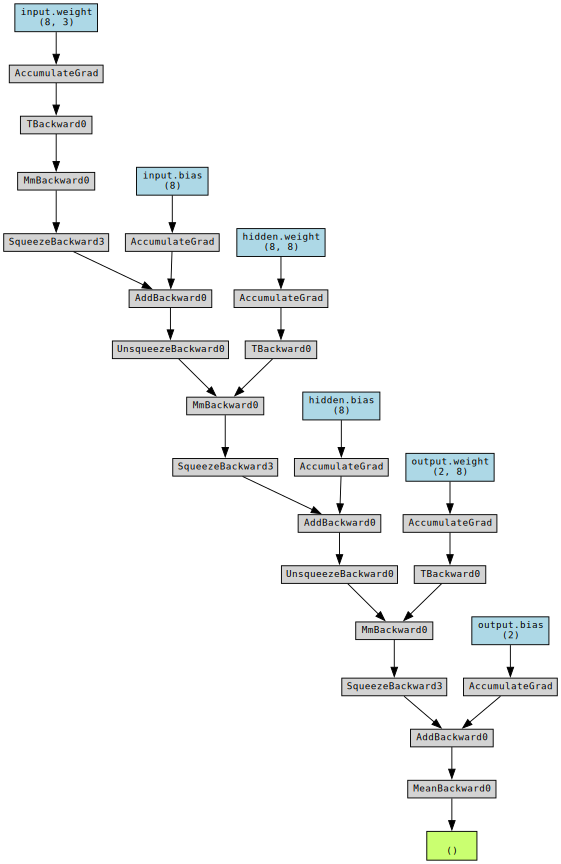

In [26]:
y = model(x)
make_dot(y.mean(), params=dict(model.named_parameters()))

In [44]:
for parameter in model.parameters():
    print(parameter.shape, parameter)

torch.Size([8, 3]) Parameter containing:
tensor([[-0.4745, -0.1315,  0.1377],
        [-0.1614, -0.1416,  0.1121],
        [-0.0076, -0.4754, -0.3662],
        [-0.5084, -0.1379, -0.2982],
        [-0.3421,  0.0999,  0.4349],
        [-0.5005,  0.1912,  0.0892],
        [-0.4665,  0.5315,  0.0764],
        [-0.2976,  0.5277, -0.3880]], requires_grad=True)
torch.Size([8]) Parameter containing:
tensor([ 0.4074,  0.3243,  0.3026, -0.1820,  0.3588,  0.0278, -0.4926,  0.5187],
       requires_grad=True)
torch.Size([8, 8]) Parameter containing:
tensor([[-0.1624, -0.1902, -0.2497,  0.3108,  0.0813,  0.1598, -0.3361,  0.2512],
        [-0.2763,  0.1780, -0.2800,  0.1591,  0.0887,  0.3134,  0.0466, -0.2774],
        [ 0.2704,  0.0822, -0.2081,  0.2083,  0.1810,  0.1218,  0.3178, -0.3416],
        [-0.3287,  0.1773,  0.1398, -0.3337,  0.2519,  0.2367,  0.0538, -0.0954],
        [-0.3251, -0.2394, -0.1542, -0.2701, -0.3007,  0.3266,  0.1722,  0.0875],
        [ 0.2682, -0.3470,  0.2040,  0.2704, 